## Using Numpy

In [3]:
import numpy

## Using SKLearn

In [4]:
import sklearn

## Building Decision Tree

## Numpy

In [11]:
a = [1,2,3,4,5] # list
b = {'a':1, 'b':2} # dictionary
c = (1,2,3) # tuple


In [13]:
a.append('Hello World')

In [14]:
a

[1, 2, 3, 4, 5, 'Hello World']

In [15]:
a = [1,2,3] 
b = [2,3,4]


In [19]:
for i in range(0,len(a)):
     print(a[i] * b[i])

2
6
12


In [21]:
import numpy 
# 1. all the data are in same type
# 2. you cannot modify the numpy array:e.g. append
na = numpy.array(a)
nb = numpy.array(b)
na
nb

array([2, 3, 4])

In [25]:
na * nb
na + nb
na - nb
na / nb

array([0.5       , 0.66666667, 0.75      ])

### 利用 load_iris 將資料存放到 iris 物件中

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()

In [9]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [26]:
iris.data.shape

(150, 4)

In [28]:
len(iris.target)

150

### 建立決策樹模型

In [29]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [30]:
?DecisionTreeClassifier

In [31]:
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [34]:
test_data = numpy.array([[5, 4, 3, 2]])

In [35]:
clf.predict(test_data)

array([1])

In [36]:
clf.predict(iris.data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 繪製模型

In [39]:
from sklearn import tree
tree.export_graphviz(clf, out_file='tree.dot')

### 建立兩層決策樹

In [44]:
from sklearn.tree import DecisionTreeClassifier
X = iris.data[:,[2,3]]
y =  iris.target

clf = DecisionTreeClassifier(max_depth=2)

clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [45]:
from sklearn import tree
tree.export_graphviz(clf, out_file='tree2.dot')

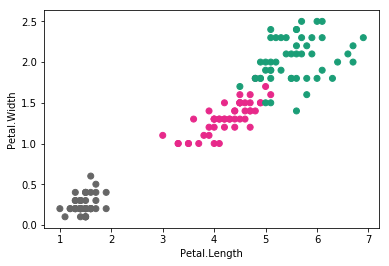

In [53]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, cmap = plt.cm.Dark2_r)
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.show()


In [56]:
import numpy as np
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
np.arange(y_min, y_max, 0.1))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z

array([0, 0, 0, ..., 2, 2, 2])

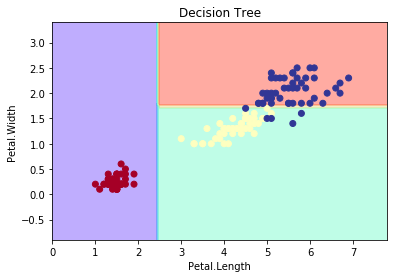

In [57]:
plt.plot()
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.rainbow)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, cmap = plt.cm.RdYlBu)
plt.title('Decision Tree')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.show()


In [59]:
predicted = clf.predict(X)
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [63]:
sum(predicted == iris.target) / len(iris.target)

0.96

In [64]:
from sklearn.metrics import confusion_matrix
confusion_matrix(iris.target, predicted)

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  5, 45]], dtype=int64)

## Module

### Method 1

In [65]:
from test.qoo import a

In [66]:
a.hello()

hello world


In [67]:
a = 123

In [68]:
a.hello()

AttributeError: 'int' object has no attribute 'hello'

In [69]:
import test
test.qoo.a.hello()

hello world
